# Autogluon Experiments

In [26]:
import pandas as pd

from sklearn.model_selection import train_test_split

from autogluon.tabular import TabularPredictor

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

In [27]:


x = pd.read_csv(r"E:\my-projs\changing-history-wall-street-sentiments\wall-street-sentiments\experimentation\data\raw_data\data.csv")

x_train, x_test, y_train, y_test = train_test_split(
    x, x['label'], test_size=0.2,random_state=42
)

## Initial Prototyping

In [28]:
predictor = TabularPredictor(label='label').fit(x_train, presets='medium_quality')

y_pred = predictor.predict(x_test)

print(classification_report(y_test, y_pred))

No path specified. Models will be saved in: "AutogluonModels\ag-20230827_015232\"
Presets specified: ['medium_quality']
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230827_015232\"
AutoGluon Version:  0.8.2
Python Version:     3.10.0
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   182.41 GB / 286.96 GB (63.6%)
Train Data Rows:    568
Train Data Columns: 22
Label Column: label
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available 

              precision    recall  f1-score   support

           0       0.53      0.57      0.55        68
           1       0.58      0.54      0.56        74

    accuracy                           0.56       142
   macro avg       0.56      0.56      0.56       142
weighted avg       0.56      0.56      0.56       142



In [29]:
print("AutoGluon infers problem type is: ", predictor.problem_type)
print("AutoGluon identified the following types of features:")
print(predictor.feature_metadata)

AutoGluon infers problem type is:  binary
AutoGluon identified the following types of features:
('category', [])             :  1 | ['ticker']
('float', [])                : 14 | ['mentioning_users', 'sentiment', 'mentions_24h_ago', 'beta', 'earnings_per_share_ttm', ...]
('int', [])                  :  4 | ['rank', 'mentions', 'upvotes', 'rank_24h_ago']
('int', ['bool'])            :  1 | ['dividend_exists']
('int', ['datetime_as_int']) :  4 | ['timestamp', 'timestamp.month', 'timestamp.day', 'timestamp.dayofweek']


In [30]:
predictor.leaderboard(x_test, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsUnif,0.690141,0.640351,0.023003,0.010001,0.009002,0.023003,0.010001,0.009002,1,True,1
1,KNeighborsDist,0.669014,0.614035,0.035997,0.011997,0.007998,0.035997,0.011997,0.007998,1,True,2
2,CatBoost,0.612676,0.649123,0.012996,0.005000,22.067997,0.012996,0.005000,22.067997,1,True,7
3,XGBoost,0.556338,0.657895,0.031003,0.006004,0.788994,0.031003,0.006004,0.788994,1,True,11
4,LightGBMXT,0.556338,0.657895,0.063004,0.006004,0.973995,0.063004,0.006004,0.973995,1,True,3
5,WeightedEnsemble_L2,0.556338,0.657895,0.065003,0.007004,1.688999,0.001999,0.000999,0.715004,2,True,14
6,LightGBMLarge,0.549296,0.596491,0.014994,0.004000,1.586993,0.014994,0.004000,1.586993,1,True,13
7,NeuralNetTorch,0.542254,0.578947,0.039004,0.020000,3.952995,0.039004,0.020000,3.952995,1,True,12
8,RandomForestGini,0.535211,0.561404,0.099001,0.078996,0.726997,0.099001,0.078996,0.726997,1,True,5
9,ExtraTreesGini,0.528169,0.552632,0.113002,0.078000,0.700003,0.113002,0.078000,0.700003,1,True,8


## Best Quality Preset

In [31]:
predictor = TabularPredictor(label='label').fit(x_train, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels\ag-20230827_015309\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=5, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230827_015309\"
AutoGluon Version:  0.8.2
Python Version:     3.10.0
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   182.39 GB / 286.96 GB (63.6%)
Train Data Rows:    568
Train Data Columns: 22
Label Column: label
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Ge

In [32]:

y_pred = predictor.predict(x_test.drop(columns=['label']))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.68      0.68        68
           1       0.71      0.72      0.71        74

    accuracy                           0.70       142
   macro avg       0.70      0.70      0.70       142
weighted avg       0.70      0.70      0.70       142



In [33]:
predictor.leaderboard()

                      model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.654930       0.418947  54.115988                0.002998           1.044009            2       True         14
1     KNeighborsDist_BAG_L1   0.649648       0.018996   0.006997                0.018996           0.006997            1       True          2
2     KNeighborsUnif_BAG_L1   0.649648       0.031994   0.008004                0.031994           0.008004            1       True          1
3            XGBoost_BAG_L1   0.610915       0.048004   4.747992                0.048004           4.747992            1       True         11
4      LightGBMLarge_BAG_L1   0.609155       0.021000   5.336996                0.021000           5.336996            1       True         13
5           CatBoost_BAG_L1   0.605634       0.018996  34.039990                0.018996          34.039990            1       True          7

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.654930,0.418947,54.115988,0.002998,1.044009,2,True,14
1,KNeighborsDist_BAG_L1,0.649648,0.018996,0.006997,0.018996,0.006997,1,True,2
2,KNeighborsUnif_BAG_L1,0.649648,0.031994,0.008004,0.031994,0.008004,1,True,1
3,XGBoost_BAG_L1,0.610915,0.048004,4.747992,0.048004,4.747992,1,True,11
4,LightGBMLarge_BAG_L1,0.609155,0.021000,5.336996,0.021000,5.336996,1,True,13
5,CatBoost_BAG_L1,0.605634,0.018996,34.039990,0.018996,34.039990,1,True,7
6,LightGBM_BAG_L1,0.603873,0.019995,4.589994,0.019995,4.589994,1,True,4
7,LightGBMXT_BAG_L1,0.589789,0.041004,4.181994,0.041004,4.181994,1,True,3
8,NeuralNetFastAI_BAG_L1,0.561620,0.109000,8.825996,0.109000,8.825996,1,True,10
9,ExtraTreesEntr_BAG_L1,0.549296,0.127003,0.781995,0.127003,0.781995,1,True,9


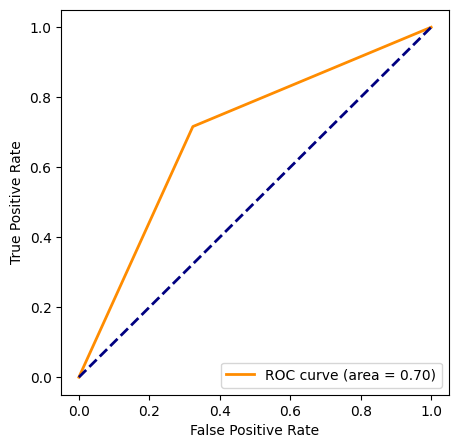

In [34]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)

plt.legend(loc="lower right", fontsize=10)
plt.show()

In [35]:
predictor.feature_importance(x_test)

These features in provided data are not utilized by the predictor and will be ignored: ['name']
Computing feature importance via permutation shuffling for 21 features using 142 rows with 5 shuffle sets...
	61.93s	= Expected runtime (12.39s per shuffle set)
	4.73s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
timestamp,0.174648,0.047607,0.000602,5,0.272671,0.076625
sentiment,0.029577,0.005892,0.000179,5,0.041709,0.017446
mentions_percentage_change_24h,0.029577,0.005892,0.000179,5,0.041709,0.017446
revenue_growth_ttm_yoy,0.028169,0.008625,0.000935,5,0.045928,0.010410
ticker,0.026761,0.009182,0.001431,5,0.045666,0.007855
opening_price,0.026761,0.007714,0.000744,5,0.042645,0.010877
mentions,0.025352,0.008029,0.001061,5,0.041885,0.008819
dividend_yield_annual,0.023944,0.008029,0.001314,5,0.040476,0.007411
beta,0.023944,0.003857,0.000078,5,0.031886,0.016002
mentioning_users,0.022535,0.011572,0.006056,5,0.046361,-0.001291


### Without `timestamp`

In [37]:
x_train, x_test, y_train, y_test = train_test_split(
    x.drop(columns=['timestamp']), x['label'], test_size=0.2,random_state=42
)

predictor = TabularPredictor(label='label').fit(x_train, presets='best_quality')

y_pred = predictor.predict(x_test)

print(classification_report(y_test, y_pred))

No path specified. Models will be saved in: "AutogluonModels\ag-20230827_022805\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=5, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230827_022805\"
AutoGluon Version:  0.8.2
Python Version:     3.10.0
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   182.35 GB / 286.96 GB (63.5%)
Train Data Rows:    568
Train Data Columns: 21
Label Column: label
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Ge

              precision    recall  f1-score   support

           0       0.49      0.59      0.54        68
           1       0.54      0.45      0.49        74

    accuracy                           0.51       142
   macro avg       0.52      0.52      0.51       142
weighted avg       0.52      0.51      0.51       142



In [40]:
predictor.leaderboard()

                      model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.568662       0.105014  45.348987                0.001995           1.161000            2       True         14
1           CatBoost_BAG_L1   0.566901       0.020000  38.960994                0.020000          38.960994            1       True          7
2           LightGBM_BAG_L1   0.558099       0.031999   3.774998                0.031999           3.774998            1       True          4
3      LightGBMLarge_BAG_L1   0.556338       0.019991   5.065995                0.019991           5.065995            1       True         13
4    NeuralNetFastAI_BAG_L1   0.552817       0.098011  11.381882                0.098011          11.381882            1       True         10
5            XGBoost_BAG_L1   0.545775       0.083019   5.226993                0.083019           5.226993            1       True         11

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.568662,0.105014,45.348987,0.001995,1.161000,2,True,14
1,CatBoost_BAG_L1,0.566901,0.020000,38.960994,0.020000,38.960994,1,True,7
2,LightGBM_BAG_L1,0.558099,0.031999,3.774998,0.031999,3.774998,1,True,4
3,LightGBMLarge_BAG_L1,0.556338,0.019991,5.065995,0.019991,5.065995,1,True,13
4,NeuralNetFastAI_BAG_L1,0.552817,0.098011,11.381882,0.098011,11.381882,1,True,10
5,XGBoost_BAG_L1,0.545775,0.083019,5.226993,0.083019,5.226993,1,True,11
6,ExtraTreesGini_BAG_L1,0.533451,0.124997,0.779005,0.124997,0.779005,1,True,8
7,LightGBMXT_BAG_L1,0.531690,0.042977,3.405994,0.042977,3.405994,1,True,3
8,NeuralNetTorch_BAG_L1,0.528169,0.113003,8.530529,0.113003,8.530529,1,True,12
9,RandomForestGini_BAG_L1,0.528169,0.127995,0.775001,0.127995,0.775001,1,True,5


In [41]:
predictor.feature_importance(x_test)

These features in provided data are not utilized by the predictor and will be ignored: ['name']
Computing feature importance via permutation shuffling for 20 features using 142 rows with 5 shuffle sets...
	37.7s	= Expected runtime (7.54s per shuffle set)
	1.5s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
revenue_growth_ttm_yoy,0.047887,0.007714,0.000078,5,0.063771,0.032003
ticker,0.032394,0.030126,0.036999,5,0.094424,-0.029635
rank_percentage_change_24h,0.028169,0.014085,0.005528,5,0.057169,-0.000831
opening_price,0.026761,0.015267,0.008628,5,0.058196,-0.004675
closing_price,0.023944,0.016212,0.014933,5,0.057325,-0.009438
mentions,0.019718,0.020772,0.050519,5,0.062487,-0.023051
upvotes,0.016901,0.018364,0.054350,5,0.054713,-0.020910
return_on_equity_ttm,0.015493,0.019541,0.075472,5,0.055729,-0.024743
rank,0.012676,0.007714,0.010656,5,0.028560,-0.003208
dividend_exists,0.011268,0.011784,0.049650,5,0.035531,-0.012996
